In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from graphviz import Source
from sklearn.tree import export_graphviz

In [ ]:
titanic = sns.load_dataset("titanic")

In [ ]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
print(titanic.columns)



Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [ ]:
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


**ở bảng này cho ta thấy số lượng dòng bị thiếu thông tin tương ứng cho từng cột đặc trưng của hành khách**

In [ ]:
col = ['age']
titanic[col].fillna(titanic[col].median(), inplace=True)
titanic.dropna(subset=["embark_town", "embarked"],inplace=True)


/tmp/ipython-input-3747034373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic[col].fillna(titanic[col].median(), inplace=True)


**ở các cột embarked và embark_town đều có 2 dòng bị thiếu dữ liệu, em đã xử lý tình huống này bằng cách xóa các hàng đó. Cột Age có 177 dòng bị thiếu, em đã điền giá trị trung vị vào từng hàng tương ứng, vì giá trị trung vị có độ chính xác cao hơn giá trị trung bình trong trường hợp có 1 giá trị cực lớn hoặc cực nhỏ khiến cho giá trị trung bình bị kéo theo.**

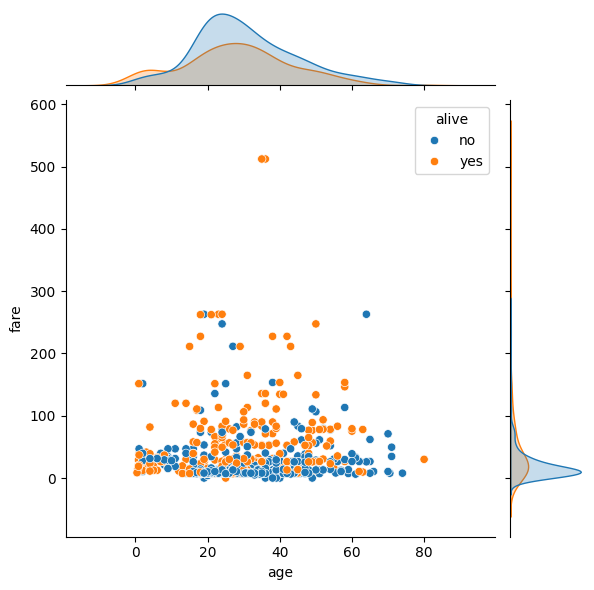

In [ ]:
sns.jointplot(data=titanic, x='age', y='fare', hue='alive')

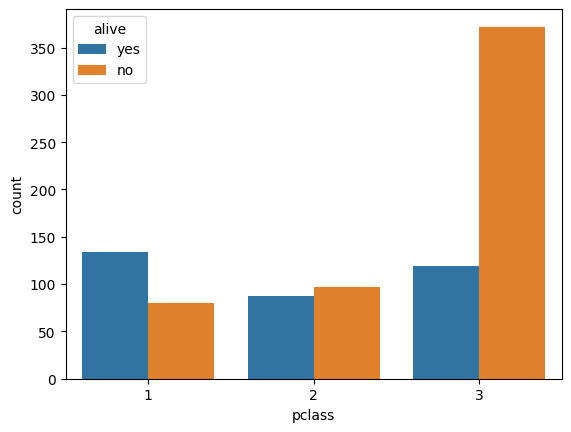

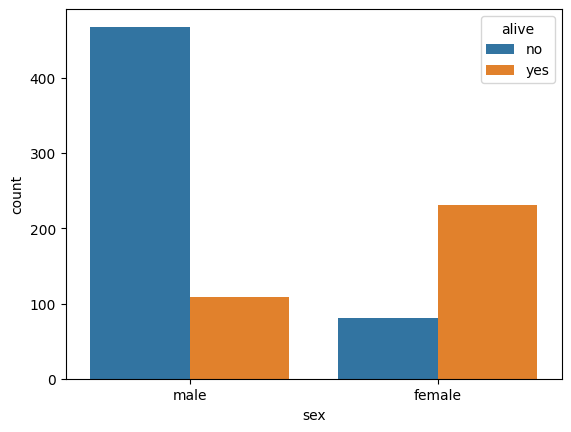

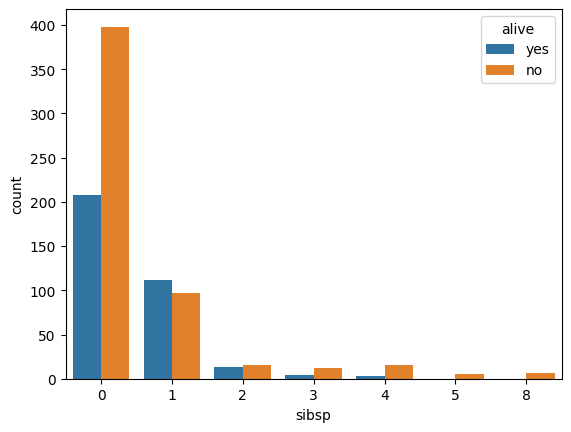

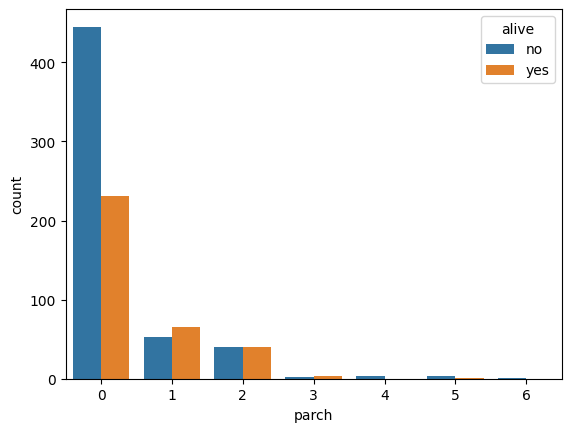

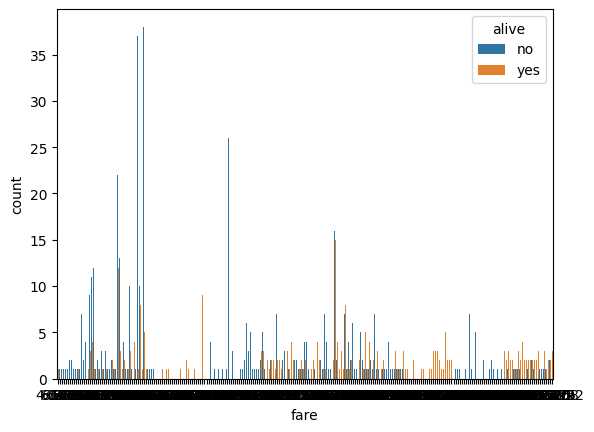

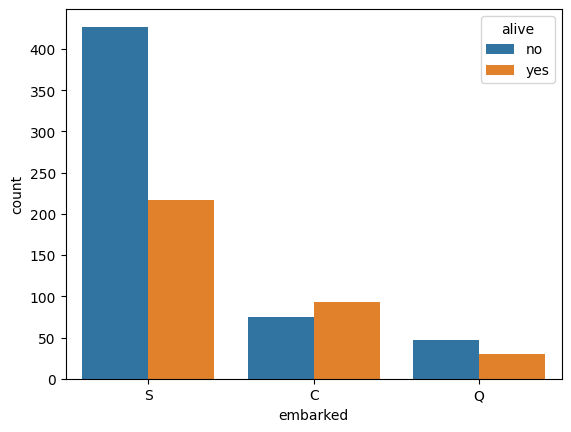

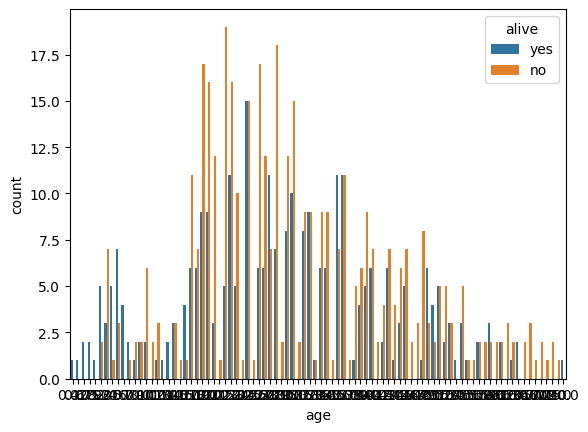

In [ ]:
features = ['pclass', 'sex', 'sibsp', 'parch', 'fare', 'embarked', 'age']

for col in features:
    sns.countplot(data=titanic, x=col, hue='alive')
    plt.show()

In [ ]:
# Mã hóa sex
titanic['sex'] = titanic['sex'].map({'male':0, 'female':1})

# Mã hóa embarked
titanic['embarked'] = titanic['embarked'].map({'C':0, 'Q':1, 'S':2})

X=titanic[['pclass', 'sex', 'sibsp', 'parch', 'fare', 'embarked', 'age', 'adult_male']]
y=titanic["alive"]
model=DecisionTreeClassifier(max_depth=4,random_state=24521703)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=24521703)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=24521703)

[Text(0.5446428571428571, 0.9, 'adult_male <= 0.5\ngini = 0.467\nsamples = 711\nvalue = [447, 264]\nclass = no'),
 Text(0.2857142857142857, 0.7, 'pclass <= 2.5\ngini = 0.407\nsamples = 271\nvalue = [77, 194]\nclass = yes'),
 Text(0.4151785714285714, 0.8, 'True  '),
 Text(0.14285714285714285, 0.5, 'fare <= 26.125\ngini = 0.111\nsamples = 136\nvalue = [8, 128]\nclass = yes'),
 Text(0.07142857142857142, 0.3, 'age <= 56.0\ngini = 0.198\nsamples = 54\nvalue = [6, 48]\nclass = yes'),
 Text(0.03571428571428571, 0.1, 'gini = 0.171\nsamples = 53\nvalue = [5, 48]\nclass = yes'),
 Text(0.10714285714285714, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = no'),
 Text(0.21428571428571427, 0.3, 'fare <= 149.035\ngini = 0.048\nsamples = 82\nvalue = [2, 80]\nclass = yes'),
 Text(0.17857142857142858, 0.1, 'gini = 0.0\nsamples = 68\nvalue = [0, 68]\nclass = yes'),
 Text(0.25, 0.1, 'gini = 0.245\nsamples = 14\nvalue = [2, 12]\nclass = yes'),
 Text(0.42857142857142855, 0.5, 'fare <= 23.35\ngini = 0.

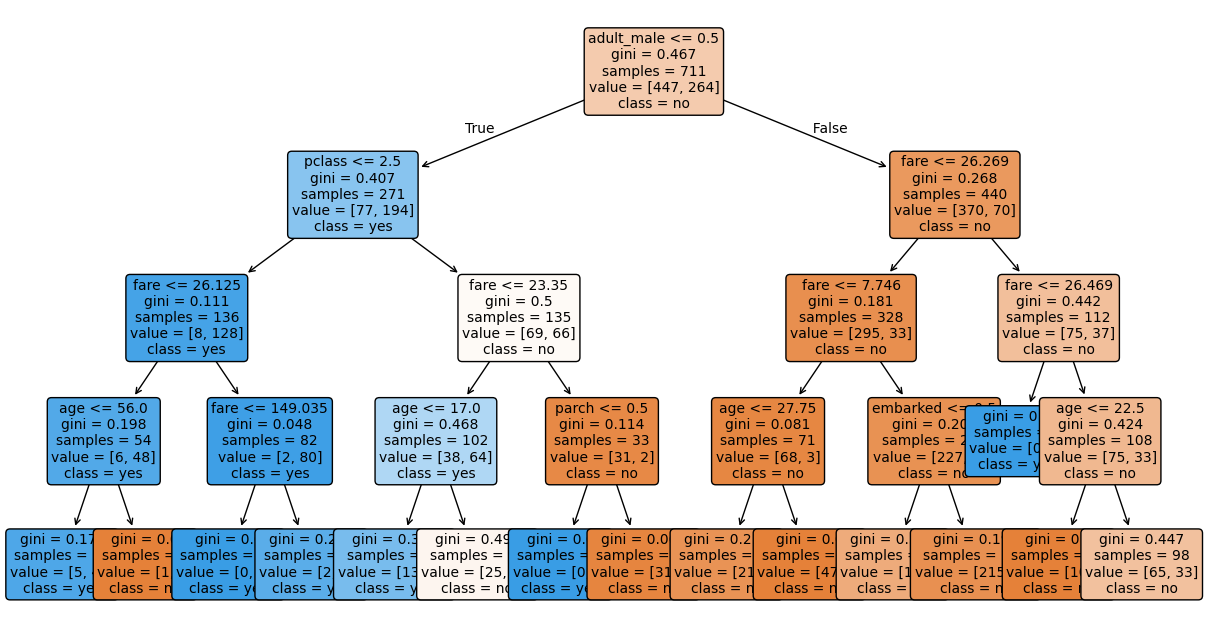

In [ ]:
plt.figure(figsize=(15,8))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=y.unique(),
    filled=True,
    rounded=True,
    fontsize=10
)

In [ ]:
y_pred=model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print("Độ chính xác:",acc)

Độ chính xác: 0.8202247191011236
